In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the data

In [2]:
df = pd.read_csv("injury-details-2024-q1.csv")
df.head()

,Date,Route,Operator,Borough,Garage,Incident type,Injury outcome,Victim category,Age,Gender,Injury,ID
0,2014-01-01,430,Go-Ahead,Wandsworth,Putney,Slip Trip Fall,Taken to hospital,Passenger / customer,Adult (18-65),Male,Yes,39727.0
1,2014-01-01,N35,Abellio,Southwark,Walworth,Slip Trip Fall,Other,Passenger / customer,Adult (18-65),Female,Yes,39730.0
2,2014-01-01,7,Metroline,Westminster,West Perivale,Slip Trip Fall,Refused treatment,Passenger / customer,Adult (18-65),Female,Yes,39735.0
3,2014-01-01,9,RATP,Kensington & Chelsea,Stamford Brook,Slip Trip Fall,Refused treatment,Passenger / customer,Child (0-12),Unknown,Yes,39740.0
4,2014-01-01,217,Metroline,Broxbourne,Potters Bar,Collision,Taken to hospital,Pedestrian,Adult (18-65),Male,Yes,39741.0


# Data Cleaning

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67485 entries, 0 to 67484
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             67485 non-null  datetime64[ns]
 1   Route            63526 non-null  object        
 2   Operator         67485 non-null  object        
 3   Borough          67125 non-null  object        
 4   Garage           67485 non-null  object        
 5   Incident type    67485 non-null  object        
 6   Injury outcome   67485 non-null  object        
 7   Victim category  67485 non-null  object        
 8   Age              67485 non-null  object        
 9   Gender           67485 non-null  object        
 10  Injury           67485 non-null  object        
 11  ID               67464 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 6.2+ MB


In [4]:
df.drop_duplicates(inplace=True)

# Data Analysis

### Questions to answer:
1. What year have the most injuries?
2. Which months have the most injuries?
3. Does the borough have an effect on the frequency of collision injuries?
4. Which bus operator have the most fatal injuries?

## 1. What year have the most incidents?

In [5]:
print(f"Minimum Date: {df['Date'].min()} Maximum Date:{df['Date'].max()}")

Minimum Date: 2014-01-01 00:00:00 Maximum Date:2024-03-31 00:00:00


In [6]:
gp_year = df.groupby(df['Date'].dt.year).size().reset_index(name='count')
gp_year =gp_year[gp_year['Date']< 2024] #excluding 2024 because not full year
print(gp_year)

   Date  count
0  2014   6548
1  2015   6559
2  2016   6674
3  2017   7352
4  2018   6700
5  2019   6007
6  2020   4197
7  2021   5588
8  2022   7789
9  2023   8150


Text(0.5, 1.0, 'Injuries per Year')

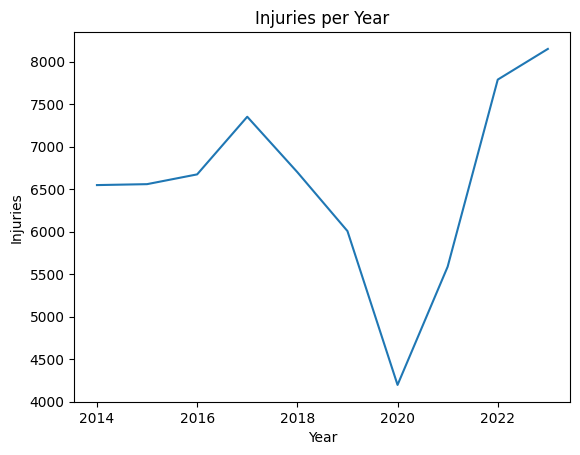

In [7]:
sns.lineplot(data=gp_year, x='Date',y='count')
plt.xlabel('Year')
plt.ylabel('Injuries')
plt.title('Injuries per Year')

### The year with the most incidents is 2023, with the least being 2020. The steep decline and increase might be caused by the COVID-19 pandemic.

## 2. Which months have the most incidents?

In [8]:
sort_month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

def custom_sort(cat):
    return sort_month.index(cat)

gp_month = df.groupby(df[df['Date'].dt.year < 2024]['Date'].dt.strftime('%b')).size().reset_index(name='count').sort_values('Date',key = lambda x: x.map(custom_sort))
print(gp_month)

   Date  count
4   Jan   4799
3   Feb   4835
7   Mar   5441
0   Apr   5043
8   May   5362
6   Jun   5709
5   Jul   6084
1   Aug   5583
11  Sep   5846
10  Oct   6060
9   Nov   5670
2   Dec   5132


Text(0, 0.5, 'Incidents')

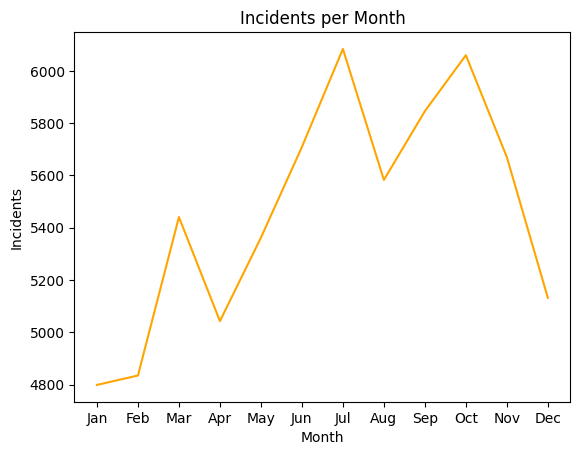

In [9]:
sns.lineplot(data=gp_month,x='Date',y='count',color='orange')
plt.title("Incidents per Month")
plt.xlabel("Month")
plt.ylabel("Incidents")

### July has the most incidents, while January has the least incidents.

## 3. Does the borough have an effect on the frequency of collision incidents?

In [10]:
df['Incident type'].unique()

array(['Slip Trip Fall', 'Collision', 'Vandalism / Hooliganism',
       'Medical Incident', 'Activity Incident Event', 'Assault',
       'Personal Injury Event', 'Fire', 'Near Miss Incident',
       'Safety Critical Failure', 'Robbery', 'Environmental Incident'],
      dtype=object)

In [11]:
filter_df = df[df['Incident type'] == 'Collision']
gp_collision = filter_df.groupby(['Borough'])['Date'].count().reset_index(name='count').sort_values('count',ascending=False).nlargest(10,columns='count')
print(gp_collision)

        Borough  count
60  Westminster    662
37      Lambeth    592
50    Southwark    538
10      Croydon    459
38     Lewisham    423
58   Wandsworth    374
18    Greenwich    370
41       Newham    351
1        Barnet    341
19      Hackney    306


Text(0.5, 0, 'Collisions')

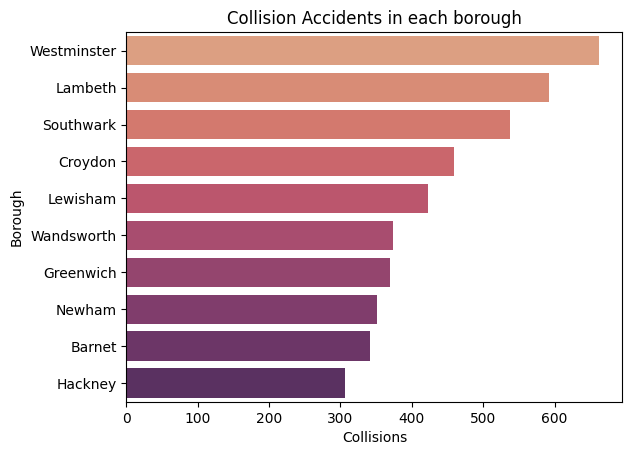

In [12]:
sns.barplot(data=gp_collision,x='count',y='Borough',palette='flare',hue='Borough')
plt.title("Collision Accidents in each borough")
plt.ylabel("Borough")
plt.xlabel("Collisions")

### Some boroughs does have more collision accidents than others. Westminster have the most collisions.

## 4. Which bus operator have the most "Fatal" incidents? 

In [13]:
df["Injury outcome"].unique()

array(['Taken to hospital', 'Other', 'Refused treatment', 'First aid',
       'Fatal', 'No treatment offered or required'], dtype=object)

In [14]:
gp = df.groupby('Injury outcome').size()
print(gp)

Injury outcome
Fatal                                 179
First aid                            7889
No treatment offered or required    27234
Other                                1749
Refused treatment                   16899
Taken to hospital                   13535
dtype: int64


In [15]:
serious_df = df[df['Injury outcome'].str.contains('Fatal')]

operator_gp = serious_df.groupby('Operator')['Operator'].count().reset_index(name='count').nlargest(10,'count')
print(operator_gp)

        Operator  count
3       Go-Ahead     46
4      Metroline     34
1  Arriva London     29
6     Stagecoach     25
5           RATP     22
0        Abellio     11
7  Tower Transit      8
2          Buses      4


C:\Users\pancr\AppData\Local\Temp\ipykernel_3772\3522508495.py:1: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.barplot(data=operator_gp,x='count',y='Operator',palette=sns.color_palette(),hue='Operator')


Text(0.5, 0, 'Injuries')

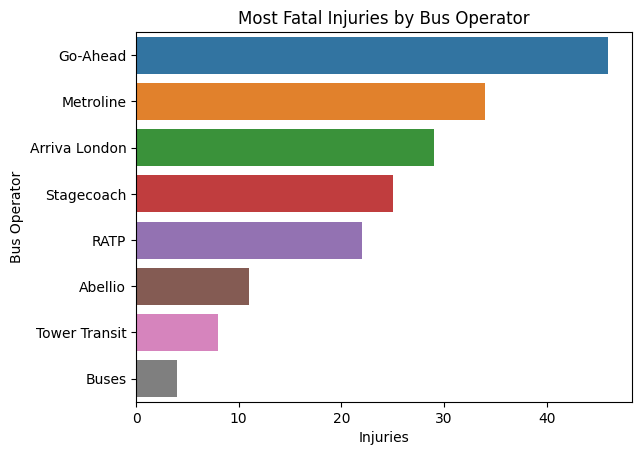

In [16]:
sns.barplot(data=operator_gp,x='count',y='Operator',palette=sns.color_palette(),hue='Operator')
plt.title("Most Fatal Injuries by Bus Operator")
plt.ylabel('Bus Operator')
plt.xlabel("Injuries")

### The top 3 bus operators with most fatal injuries is Go-Ahead, Metroline, Arriva London.